In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [29]:
df_train = pd.read_csv('UNSW_NB15_training-set.csv')
df_test = pd.read_csv('UNSW_NB15_testing-set.csv')

In [30]:
df_train.shape,df_test.shape

((175341, 45), (82332, 45))

In [31]:
df_train.isnull().sum().sort_values(ascending=False)

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [32]:
df_test.isnull().sum().sort_values(ascending=False)

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [33]:
label = LabelEncoder()
cat = df_train.select_dtypes(include='object').columns
for col in cat:
    df_train[col] = label.fit_transform(df_train[col])

In [34]:
cat = df_test.select_dtypes(include='object').columns
for col in cat:
    df_test[col] = label.fit_transform(df_test[col])

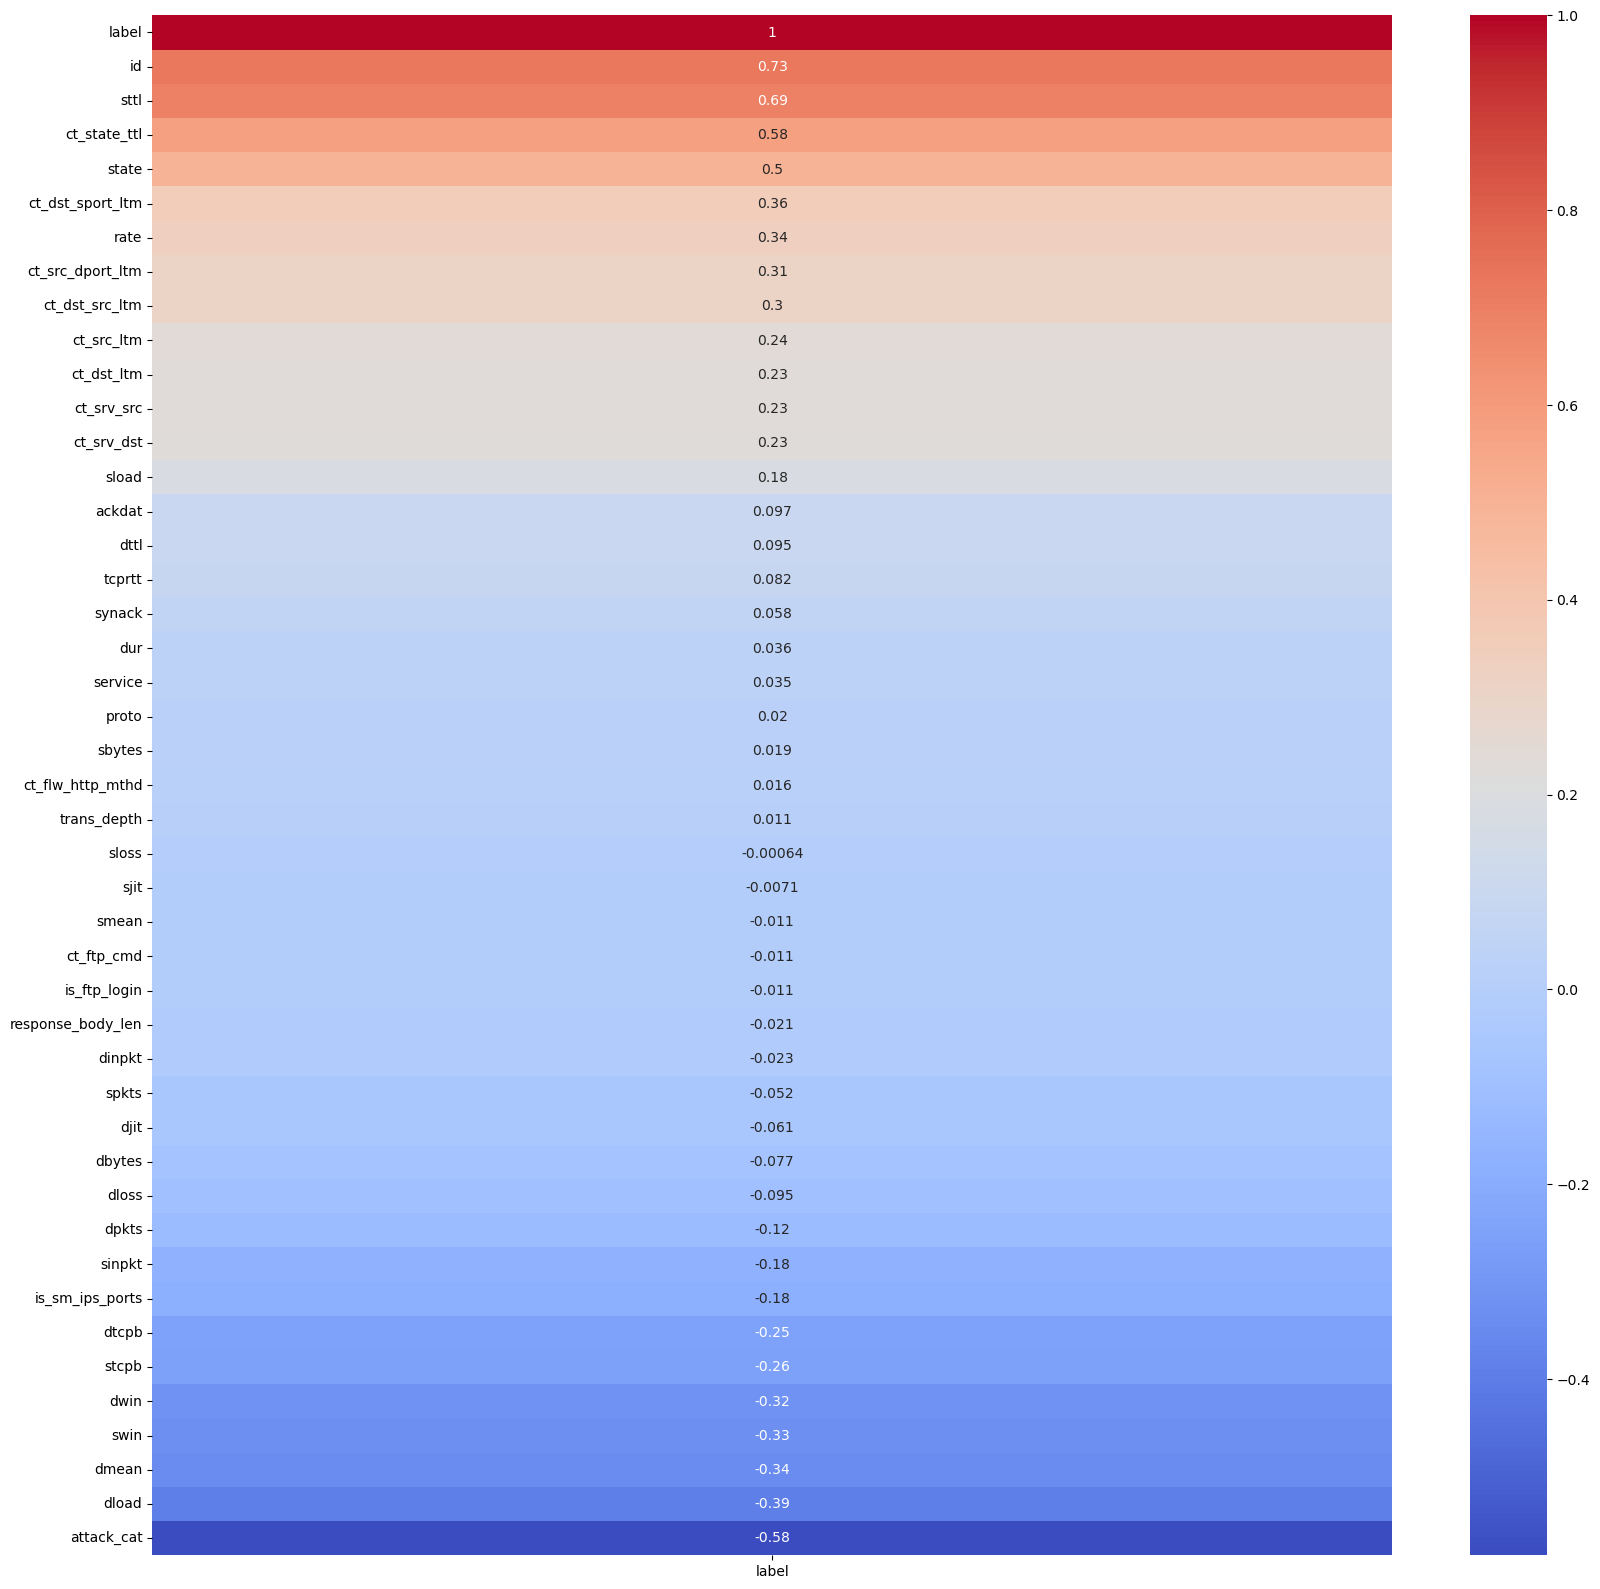

In [35]:
corr = df_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr[['label']].sort_values(by='label',ascending=False),annot=True,cmap='coolwarm')
plt.show()

In [36]:
df_train['label'].value_counts()

label
1    119341
0     56000
Name: count, dtype: int64

In [37]:
df_test['label'].value_counts()

label
1    45332
0    37000
Name: count, dtype: int64

In [38]:
df_train_sample = df_train.sample(frac=0.1,random_state=42)

In [39]:
X = df_train_sample.drop('label' , axis=1)
y = df_train_sample['label']

In [40]:
St = StandardScaler()
X_scaled = St.fit_transform(X)
X = X_scaled

In [41]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
models = {
    'Logestic Regression' : {
        'Model' : LogisticRegression(),
        'para' : {
            'C' : [0.1,1,10],
            'max_iter' : [100,300,500]
        }
    },
    'KNN' : {
        'Model' : KNeighborsClassifier(),
        'para' : {
            'n_neighbors' : [3,7]
        }
    },
    'Tree' : {
        'Model' : DecisionTreeClassifier(),
        'para' : {
            'max_depth' : [5,10]
        }
    },
    'Random Forest' : {
        'Model' : RandomForestClassifier(),
        'para' : {
            'n_estimators' : [50,300]
        }
    }
}

In [43]:
scores = []
for name, model in models.items():
    print("Training Model : " + name)
    start_time = datetime.now()
    sc = GridSearchCV(model['Model'], param_grid=model['para'], cv=5)
    sc.fit(X_train, y_train)
    scores.append({
        'Model': name,
        'Best Score': sc.best_score_,
        'Best Paramater': sc.best_params_
    })
    time_consumed = datetime.now() - start_time
    print("Time Consumed:", time_consumed)

Training Model : Logestic Regression
Time Consumed: 0:00:09.520047
Training Model : KNN
Time Consumed: 0:00:01.759126
Training Model : Tree
Time Consumed: 0:00:00.962708
Training Model : Random Forest
Time Consumed: 0:00:27.446950


In [44]:
scores = pd.DataFrame(scores)
scores

,Model,Best Score,Best Paramater
0,Logestic Regression,0.964283,"{'C': 10, 'max_iter': 100}"
1,KNN,0.989734,{'n_neighbors': 3}
2,Tree,1.000000,{'max_depth': 5}
3,Random Forest,0.999644,{'n_estimators': 50}


In [45]:
X_df_train = df_train.drop('label',axis=1)
X_df_test = df_test.drop('label',axis=1)

y_df_train = df_train['label']
y_df_test = df_test['label']

X_scaled = St.fit_transform(X_df_test)
X_df_test = X_scaled

X_scaled = St.fit_transform(X_df_train)
X_df_train = X_scaled

In [46]:
X_df_train.shape , X_df_test.shape

((175341, 44), (82332, 44))

In [47]:
model = RandomForestClassifier(n_estimators=300 , random_state=42)
model.fit(X_df_train,y_df_train)
y_pred = model.predict(X_df_test)

In [48]:
model.score(X_df_train,y_df_train)*100

100.0

In [49]:
accuracy_score(y_df_test,y_pred)*100

88.1989991740757

In [50]:
y_train_pred = model.predict(X_df_train)
train_acc = accuracy_score(y_df_train, y_train_pred) * 100
test_acc  = accuracy_score(y_df_test, y_pred) * 100

In [51]:
train_acc,test_acc

(100.0, 88.1989991740757)

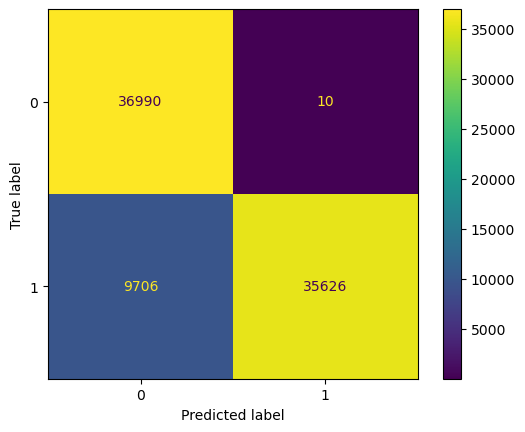

In [52]:
ConfusionMatrixDisplay.from_predictions(y_df_test,y_pred)

In [53]:
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X_df_train, y_df_train)

# print("Original training label distribution:")
# print(y_df_train.value_counts())
# print("After SMOTE training label distribution:")
# print(pd.Series(y_res).value_counts())

# # ===== بعد SMOTE =====
# model_sm = RandomForestClassifier(n_estimators=500, random_state=42)
# model_sm.fit(X_res, y_res)
# y_pred_sm = model_sm.predict(X_df_test)

# print("===== After SMOTE =====")
# print("Train Accuracy:", model_sm.score(X_res, y_res)*100)
# print("Test Accuracy:", accuracy_score(y_df_test, y_pred_sm)*100)

# ConfusionMatrixDisplay.from_predictions(y_df_test, y_pred_sm, cmap='Greens')
# plt.title("Confusion Matrix - After SMOTE")
# plt.show()